<a href="https://colab.research.google.com/github/nagamukesh/NLP-SMP/blob/Varshini_Adurti/Assignment_2_Varshini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Real News Vs Fake News Detection Classifier

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame as df
import seaborn as sns
!pip install nltk
import nltk

##Data Retrieval

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
path='/content/drive/MyDrive/datasets/fake_and_real_news.csv'

raw= open(path).read()

raw[0: 1000]

'Text,label\n" Top Trump Surrogate BRUTALLY Stabs Him In The Back: ‘He’s Pathetic’ (VIDEO) It s looking as though Republican presidential candidate Donald Trump is losing support even from within his own ranks. You know things are getting bad when even your top surrogates start turning against you, which is exactly what just happened on Fox News when Newt Gingrich called Trump  pathetic. Gingrich knows that Trump needs to keep his focus on Hillary Clinton if he even remotely wants to have a chance at defeating her. However, Trump has hurt feelings because many Republicans don t support his sexual assault against women have turned against him, including House Speaker Paul Ryan (R-WI). So, that has made Trump lash out as his own party.Gingrich said on Fox News: Look, first of all, let me just say about Trump, who I admire and I ve tried to help as much as I can. There s a big Trump and a little Trump. The little Trump is frankly pathetic. I mean, he s mad over not getting a phone call? T

In [42]:
data= pd.read_csv(path,names=['label','raw_text'], header=None)
data.head()
data = df(data)

# Just changing the order of label and raw-text to have a clear visual

temp=data['raw_text']
data['raw_text']= data['label']
data['label']=temp

data=data.drop(axis=0, index=0).reset_index(drop=True)

data.head()


,label,raw_text
0,Fake,Top Trump Surrogate BRUTALLY Stabs Him In The...
1,Real,U.S. conservative leader optimistic of common ...
2,Real,"Trump proposes U.S. tax overhaul, stirs concer..."
3,Fake,Court Forces Ohio To Allow Millions Of Illega...
4,Real,Democrats say Trump agrees to work on immigrat...


##Preprocessing

Downloading nltk packages for preprocessing.

In [43]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Lowercasing

In [44]:
def lower(text):
  text=text.lower()
  return text

data['lower_text']=data['raw_text'].apply(lambda x: lower(x))
data.head()

,label,raw_text,lower_text
0,Fake,Top Trump Surrogate BRUTALLY Stabs Him In The...,top trump surrogate brutally stabs him in the...
1,Real,U.S. conservative leader optimistic of common ...,u.s. conservative leader optimistic of common ...
2,Real,"Trump proposes U.S. tax overhaul, stirs concer...","trump proposes u.s. tax overhaul, stirs concer..."
3,Fake,Court Forces Ohio To Allow Millions Of Illega...,court forces ohio to allow millions of illega...
4,Real,Democrats say Trump agrees to work on immigrat...,democrats say trump agrees to work on immigrat...


Tokenisation

In [45]:
import re

def Tokenise(text):
  text=re.split('\W+',text) #takes care to not include special characters, while word_tokenize and split both include them unless preprocessed.
  text= [word for word in text if word!='']  #We do not need the '' (empty strings) which appear due to splitting excluding the special characters
  return text

data['tokenise_text']=data['lower_text'].apply(lambda x: Tokenise(x))
data.head()

,label,raw_text,lower_text,tokenise_text
0,Fake,Top Trump Surrogate BRUTALLY Stabs Him In The...,top trump surrogate brutally stabs him in the...,"[top, trump, surrogate, brutally, stabs, him, ..."
1,Real,U.S. conservative leader optimistic of common ...,u.s. conservative leader optimistic of common ...,"[u, s, conservative, leader, optimistic, of, c..."
2,Real,"Trump proposes U.S. tax overhaul, stirs concer...","trump proposes u.s. tax overhaul, stirs concer...","[trump, proposes, u, s, tax, overhaul, stirs, ..."
3,Fake,Court Forces Ohio To Allow Millions Of Illega...,court forces ohio to allow millions of illega...,"[court, forces, ohio, to, allow, millions, of,..."
4,Real,Democrats say Trump agrees to work on immigrat...,democrats say trump agrees to work on immigrat...,"[democrats, say, trump, agrees, to, work, on, ..."


Removing Stopwords

In [46]:
stopwords=nltk.corpus.stopwords.words('english')

def stopWord(text):
  text=[word for word in text if word not in stopwords]
  return text


data['stopword-free']=data['tokenise_text'].apply(lambda x: stopWord(x))

data.head()

,label,raw_text,lower_text,tokenise_text,stopword-free
0,Fake,Top Trump Surrogate BRUTALLY Stabs Him In The...,top trump surrogate brutally stabs him in the...,"[top, trump, surrogate, brutally, stabs, him, ...","[top, trump, surrogate, brutally, stabs, back,..."
1,Real,U.S. conservative leader optimistic of common ...,u.s. conservative leader optimistic of common ...,"[u, s, conservative, leader, optimistic, of, c...","[u, conservative, leader, optimistic, common, ..."
2,Real,"Trump proposes U.S. tax overhaul, stirs concer...","trump proposes u.s. tax overhaul, stirs concer...","[trump, proposes, u, s, tax, overhaul, stirs, ...","[trump, proposes, u, tax, overhaul, stirs, con..."
3,Fake,Court Forces Ohio To Allow Millions Of Illega...,court forces ohio to allow millions of illega...,"[court, forces, ohio, to, allow, millions, of,...","[court, forces, ohio, allow, millions, illegal..."
4,Real,Democrats say Trump agrees to work on immigrat...,democrats say trump agrees to work on immigrat...,"[democrats, say, trump, agrees, to, work, on, ...","[democrats, say, trump, agrees, work, immigrat..."


Lemmatisation

In [47]:
wnl = nltk.WordNetLemmatizer()

def Lemmatisation(text, pos):
    text = [wnl.lemmatize(word, pos) for word in text]
    return text

data["lemmatized"] = data["stopword-free"].apply(lambda x: Lemmatisation(x, 'n'))

data["lemmatized"] = data["lemmatized"].apply(lambda x: Lemmatisation(x, 'v'))

data.head()

,label,raw_text,lower_text,tokenise_text,stopword-free,lemmatized
0,Fake,Top Trump Surrogate BRUTALLY Stabs Him In The...,top trump surrogate brutally stabs him in the...,"[top, trump, surrogate, brutally, stabs, him, ...","[top, trump, surrogate, brutally, stabs, back,...","[top, trump, surrogate, brutally, stab, back, ..."
1,Real,U.S. conservative leader optimistic of common ...,u.s. conservative leader optimistic of common ...,"[u, s, conservative, leader, optimistic, of, c...","[u, conservative, leader, optimistic, common, ...","[u, conservative, leader, optimistic, common, ..."
2,Real,"Trump proposes U.S. tax overhaul, stirs concer...","trump proposes u.s. tax overhaul, stirs concer...","[trump, proposes, u, s, tax, overhaul, stirs, ...","[trump, proposes, u, tax, overhaul, stirs, con...","[trump, propose, u, tax, overhaul, stir, conce..."
3,Fake,Court Forces Ohio To Allow Millions Of Illega...,court forces ohio to allow millions of illega...,"[court, forces, ohio, to, allow, millions, of,...","[court, forces, ohio, allow, millions, illegal...","[court, force, ohio, allow, million, illegally..."
4,Real,Democrats say Trump agrees to work on immigrat...,democrats say trump agrees to work on immigrat...,"[democrats, say, trump, agrees, to, work, on, ...","[democrats, say, trump, agrees, work, immigrat...","[democrat, say, trump, agree, work, immigratio..."


#Splitting the Data

In [48]:
from sklearn.model_selection import train_test_split


x=data['raw_text']
y=data['label']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [49]:
x_train.head()

1665    As new fiscal year dawns, hope for Illinois bu...
1416    Schumer says U.S. budget deal doable if Trump ...
7298    NRA calls for more regulation after Vegas shoo...
4700    White House says Tillerson to remain as secret...
6192     Scientists Scramble To Copy Climate Data Befo...
Name: raw_text, dtype: object

##Vectorisation

Analyzer for Preprocessing the text

In [50]:
#we call the exisitng functions to clean the text through this preprocess function

def preprocess(text):
  text=lower(text)
  text=Tokenise(text)
  text=stopWord(text)
  text=Lemmatisation(text, 'n')
  text=Lemmatisation(text, 'v')
  return text

Using TFIDF Vectorisation

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf= TfidfVectorizer(analyzer=preprocess)

x_train_vect=tfidf.fit_transform(x_train) #fit_transform for train data
x_test_vect=tfidf.transform(x_test) #You need not fit for test data, just use transform (using the learned properties through fit_transform)

x_train_vect_df=df(x_train_vect.toarray())
x_test_vect_df=df(x_test_vect.toarray())

x_train_vect_df.columns=x_train_vect_df.columns.astype(str)
x_test_vect_df.columns=x_test_vect_df.columns.astype(str)


x_train_vect_df, x_test_vect_df

(        0    1    2    3    4    5    6    7    8    9  ...  42061  42062  \
 0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
 1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
 2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
 3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
 4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
 ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
 7915  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
 7916  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
 7917  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
 7918  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
 7919  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
 
       42063  42064  42065  42066  42067  42068  42069  42070 

##Evaluation of model

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix

Using Random forest Classifier

Precision: 0.998 / Recall: 0.997 / F1-Score: 0.997 / Accuracy: 99.747%


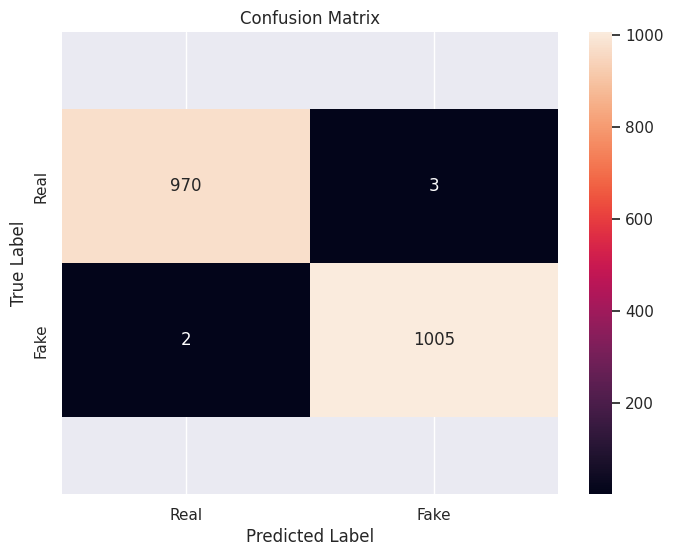

In [53]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(x_train_vect_df, y_train)

y_pred = rf_model.predict(x_test_vect_df)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='Fake', average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}%'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred)*100, 3)))

sns.set(rc= {"figure.figsize": (8, 6)})

cm = confusion_matrix(y_test, y_pred)
class_label = ["Real", "Fake"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sns.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()